# they used KNN for labelling set generation


- These columns represent the raw ADC (Analog-to-Digital Converter) signal readings from 55 different segments (zones or pixels) of the Low-Energy Electronically-Chopped PIR sensor array.
Component	Role
PIR_1 to PIR_55	Raw features from motion sensors
Each column	Motion level in a specific location
Used for	Classifying occupancy (Label 0 or 1)
Preprocessing	Normalize, filter, zone aggregation
ML Methods	Classical (RF, LR), Deep (CNN, MLP)

## feature selection algorithm
- preprocessing technique
  - rescaling
  - binarization
  - 
- feature selection technique
  - univariate selection
  - recursive feature elimination
  - PCA
- what happens if we don't do any 

In [50]:
# standard scaler

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("pirvision_office_dataset1.csv")

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
# df.set_index('DateTime', inplace=True)

pir_cols = [col for col in df.columns if 'PIR_' in col]
scaler = StandardScaler()
df[pir_cols] = scaler.fit_transform(df[pir_cols])

# change the datatype in pandas
#df['Date'] = df['Date'].astype('str')

X = df[['Temperature_F',*pir_cols]]
y = df['Label']

# # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features

<Axes: >

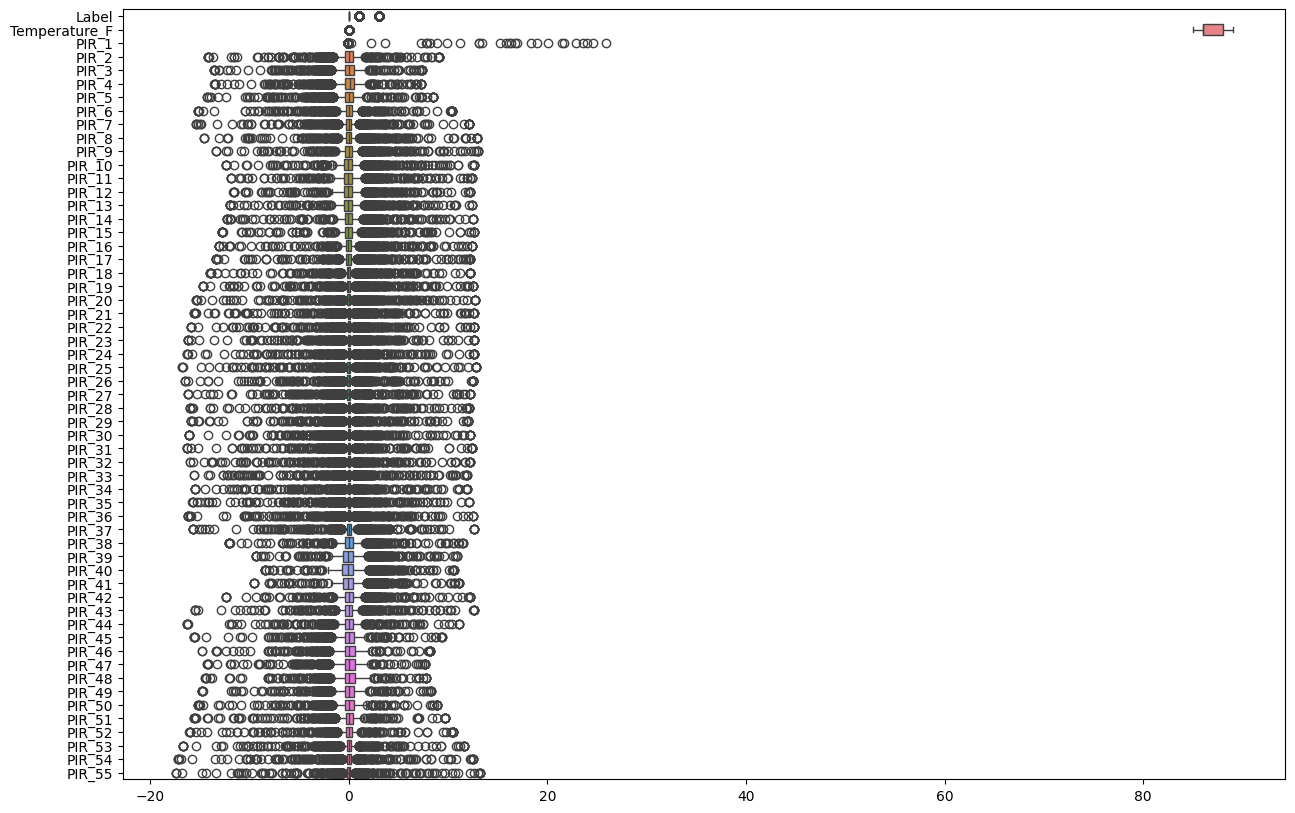

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# k-Nearest Neighbors (recommended based on prior research)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [56]:

y_pred = knn.predict(X_test)
score = accuracy_score(y_pred,y_test)
print("knn score is ",score)
print(classification_report(y_test, y_pred))

knn score is  0.991508817766166
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1250
           1       0.95      0.97      0.96       167
           3       1.00      1.00      1.00       114

    accuracy                           0.99      1531
   macro avg       0.98      0.99      0.99      1531
weighted avg       0.99      0.99      0.99      1531



In [57]:
y_pred = rf.predict(X_test)
score = accuracy_score(y_pred,y_test)
print("rf score is ",score)
print(classification_report(y_test, y_pred))

rf score is  0.992161985630307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       0.99      0.96      0.97       167
           3       0.96      1.00      0.98       114

    accuracy                           0.99      1531
   macro avg       0.98      0.98      0.98      1531
weighted avg       0.99      0.99      0.99      1531



In [58]:
y_pred = svm.predict(X_test)
score = accuracy_score(y_pred,y_test)
print("svm score is ",score)
print(classification_report(y_test, y_pred))

svm score is  0.8987589810581319
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1250
           1       0.93      0.08      0.14       167
           3       1.00      1.00      1.00       114

    accuracy                           0.90      1531
   macro avg       0.94      0.69      0.70      1531
weighted avg       0.90      0.90      0.86      1531



# Frequency-Domain Features (for chopped PIR signals)
- what is that and how do we use it?
- Chopped PIR-Specific Features

## Bidirectional LSTM in pytorch

In [ ]:
# temp and time series 

plt.figure(figsize=(15,5))
plt.plot(time, temp)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Data Time Series Temperature', fontsize=20)


## Understanding SleePIR sensor data
- Chopping Frequency: The sensor modulates IR signals at a fixed frequency (typically 1-10Hz)
- what is the time-domain and the frequency-domain
Key Features:
  -  Baseline Drift: Slow changes due to ambient temperature.
  -  Peaks & Valleys: Sharp fluctuations indicate motion.
  -  Frequency Content: Human motion typically appears in 0.1Hz–5Hz range.

You don’t need to worry about absolute units. You just treat the values as relative indicators:

- Use statistical or pattern-based features over time and space.
- Focus on how the values change, and which sensors are activated together.

## Feature engineering
- FFT
- spatial entropy
- Over Time (per sequence of rows)

## Statistical & Pattern-Based Features (Over Time and Space)
- how this motion trend data will help me, in what ways?
- Each row is a 4-second snapshot of sensor readings (PIR_1 to PIR_55), but to capture motion trends and spatial activation, we can do more:
🔹 Over Space (per snapshot / row):
- what will heatmap of 55 sensor gives me.
- spatial entropy: Measures randomness of activation across sensors (low entropy = localized movement).

🔹 Over Time (per sequence of rows):
    - time based feature ideas
      - what are the benefits of creating a temporal window?
      - things to do:
        - moving average
        - delta / change detection
        - trend features : compute slope (rate of change) using LR for each sensor across time.
        - Fourier transform or DWT: from each sensor over time, capture 

## Sensor Correlation / Co-Activation
- correlation matrix
  - compute correlation between sensors
- PCA or t-sne
  - visualize patterns/clusters 
  - check which sensors contribute most to variance (principal components)

In [63]:
import scipy
# Example engineered features
df['mean_all'] = df[pir_cols].mean(axis=1)
df['std_all'] = df[pir_cols].std(axis=1)
#df['active_sensors'] = (df[pir_cols] > 200).sum(axis=1)
df['sensor_entropy'] = df[pir_cols].apply(lambda x: scipy.stats.entropy(x + 1e-6), axis=1)


- how correlation matrix helps

In [65]:
df[pir_cols].corr()

,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,PIR_9,PIR_10,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
PIR_1,1.000000,-0.029185,-0.067569,-0.079278,-0.078245,-0.066133,-0.044826,-0.023363,-0.004589,0.013145,...,-0.086264,-0.095657,-0.095389,-0.093769,-0.083004,-0.077888,-0.062292,-0.057691,-0.041588,-0.033804
PIR_2,-0.029185,1.000000,0.921539,0.770517,0.618563,0.430132,0.202402,-0.023073,-0.202977,-0.330682,...,0.319895,0.300614,0.275618,0.244846,0.214521,0.176515,0.137906,0.101936,0.073952,0.052193
PIR_3,-0.067569,0.921539,1.000000,0.945430,0.828567,0.626351,0.343141,0.046395,-0.190819,-0.354291,...,0.453109,0.455964,0.440890,0.412271,0.374797,0.323567,0.264643,0.203322,0.146272,0.095464
PIR_4,-0.079278,0.770517,0.945430,1.000000,0.954370,0.792549,0.516410,0.198686,-0.071719,-0.266390,...,0.460826,0.480632,0.476584,0.456649,0.423724,0.373575,0.312395,0.245422,0.179957,0.118929
PIR_5,-0.078245,0.618563,0.828567,0.954370,1.000000,0.928727,0.713219,0.417670,0.135037,-0.089301,...,0.392842,0.417586,0.417958,0.405762,0.380538,0.338973,0.286526,0.228214,0.171142,0.117105
PIR_6,-0.066133,0.430132,0.626351,0.792549,0.928727,1.000000,0.913573,0.694395,0.432203,0.190760,...,0.248346,0.266054,0.264503,0.258365,0.243256,0.217264,0.183936,0.147387,0.114540,0.083816
PIR_7,-0.044826,0.202402,0.343141,0.516410,0.713219,0.913573,1.000000,0.917848,0.725885,0.502764,...,0.054623,0.058894,0.052709,0.050549,0.046705,0.039687,0.031209,0.023950,0.025599,0.029959
PIR_8,-0.023363,-0.023073,0.046395,0.198686,0.417670,0.694395,0.917848,1.000000,0.927219,0.766120,...,-0.135247,-0.146234,-0.157883,-0.156990,-0.149589,-0.137008,-0.119950,-0.096835,-0.058743,-0.016688
PIR_9,-0.004589,-0.202977,-0.190819,-0.071719,0.135037,0.432203,0.725885,0.927219,1.000000,0.941841,...,-0.262964,-0.284194,-0.303839,-0.299570,-0.288071,-0.260166,-0.228790,-0.183690,-0.123618,-0.056204
PIR_10,0.013145,-0.330682,-0.354291,-0.266390,-0.089301,0.190760,0.502764,0.766120,0.941841,1.000000,...,-0.336450,-0.361902,-0.382856,-0.374958,-0.358644,-0.320655,-0.279995,-0.223959,-0.153770,-0.075010


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=20)  # You can change this to 2 for visualization or auto for 95% variance
X_pca = pca.fit_transform(X_train)

- what variance signifies?

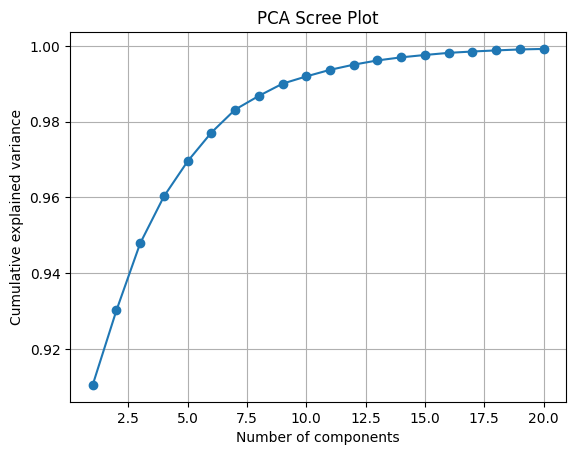

In [69]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()


In [71]:
df

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,DateTime,mean_all,std_all,active_sensors,sensor_entropy
0,2024-08-08,19:19:56,0,86,-0.055875,-0.494950,-0.551045,-0.616061,-0.558023,-0.230890,...,-0.483428,-0.355541,-0.314113,-0.376149,-0.267425,2024-08-08 19:19:56,-0.031187,0.355426,0,-inf
1,2024-08-08,19:20:12,1,86,-0.055853,-0.180633,-0.333270,-0.513508,-0.663652,-0.484048,...,-0.510887,-0.529183,-0.513220,-0.404123,-0.205231,2024-08-08 19:20:12,-0.016895,0.428023,0,-inf
2,2024-08-08,19:20:28,0,86,-0.055861,-0.373279,-0.488606,-0.507475,-0.358319,-0.255089,...,-0.432172,-0.423068,-0.431114,-0.341720,-0.409584,2024-08-08 19:20:28,-0.033590,0.373442,0,-inf
3,2024-08-08,19:20:44,0,86,-0.055899,-0.995152,-1.059694,-0.671862,-0.219681,0.072528,...,-0.542007,-0.396057,-0.188902,-0.051221,0.030219,2024-08-08 19:20:44,-0.032713,0.448092,0,-inf
4,2024-08-08,19:21:00,0,86,-0.055863,-0.586203,-0.630236,-0.519540,-0.231234,0.035299,...,-0.525531,-0.318883,-0.318218,-0.339568,-0.094170,2024-08-08 19:21:00,-0.025424,0.373858,0,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,2024-10-08,04:34:17,0,88,-0.055787,0.777524,0.717533,0.471308,0.255647,0.122788,...,0.424540,0.404626,0.157995,0.028397,-0.025312,2024-10-08 04:34:17,0.030202,0.436951,0,-inf
7647,2024-10-08,04:34:33,0,88,-0.055842,0.116784,0.423613,0.635695,0.565931,0.379669,...,0.598445,0.354462,0.176469,0.060675,0.034661,2024-10-08 04:34:33,0.020790,0.383855,0,-inf
7648,2024-10-08,04:34:49,0,88,-0.055842,-0.395247,0.056593,0.424555,0.448750,0.569538,...,0.534375,0.584056,0.671156,0.695469,0.547765,2024-10-08 04:34:49,0.034559,0.395718,0,-inf
7649,2024-10-08,04:35:05,0,88,-0.055776,0.824841,0.767789,0.570845,0.275453,-0.001930,...,0.157275,-0.102795,-0.088322,-0.165269,-0.051966,2024-10-08 04:35:05,0.018721,0.396331,0,-inf


In [75]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca_ready = pd.concat([X_pca_df, df['Label']], axis=1)  # Replace 'label' with your target column


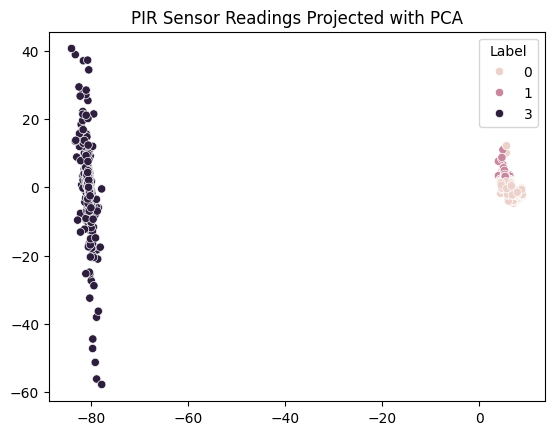

In [74]:
import seaborn as sns

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train)  # Label = Occupied or Not
plt.title("PIR Sensor Readings Projected with PCA")
plt.show()


- start with the normalization or standardization to ensure all readings are on a comparable scale.
- handling the sequential nature into a temporal order.
- engineer meaningful features from these raw readings such as statistical measures or temporal characteristics

Based on the description of the "LoginPIRvision_FoG_presence_detection" dataset and the techniques discussed in the introductory paper, here's how you can approach data preprocessing for the PIR1 to PIR55 columns:

The PIR Values (PIR_1 to PIR_55) in this dataset represent **55 raw analog sensor readings collected over a 4-second observation window**. These are **real-valued features**.

Drawing inspiration from the preprocessing steps used in the associated paper (though applied to a different sensor setup consisting of SLEEPIR voltage outputs and a single binary PIR signal), we can infer potential preprocessing techniques applicable to your PIR1-PIR55 data:

1.  **Normalization or Standardization:**
    *   The paper mentions **normalizing and zero-centering** their raw sensor data. This is a common preprocessing step to scale the features so that they have zero mean and unit variance. This ensures that features with different ranges do not disproportionately influence machine learning models, particularly distance-based algorithms like K-Nearest Neighbors (KNN) which is used in the paper. You can apply either standardization (using StandardScaler in Python's scikit-learn) or normalization (using MinMaxScaler) to the PIR1-PIR55 columns to bring them to a similar scale.

2.  **Handling Sequential Nature:**
    *   Since the 55 readings are collected over 4 seconds, they inherently have a temporal order. While the dataset is structured as tabular data where each row represents a 4-second interval, you might want to consider this sequential nature during preprocessing or feature engineering.

3.  **Feature Engineering from the Raw Readings:**
    *   Instead of directly using all 55 raw readings as features, you can engineer more meaningful features from them. This is aligned with the paper's approach of extracting six hand-crafted features from their 8-second windows of SLEEPIR and PIR data. Some potential feature engineering techniques for your PIR1-PIR55 data could include:
        *   **Statistical Measures:** Calculate statistics across the 55 readings for each 4-second observation. These could include:
            *   **Mean:** The average PIR reading over the 4 seconds.
            *   **Standard Deviation:** A measure of the variability in the PIR readings.
            *   **Minimum and Maximum:** The range of PIR values.
            *   **Percentiles (e.g., 25th, 50th, 75th):** To capture the distribution of the readings.
            *   **Variance:** The square of the standard deviation.
            *   **Skewness and Kurtosis:** Measures of the shape of the distribution.
        *   **Temporal Features:** Analyze the changes in readings over the 4 seconds:
            *   **Rate of Change:** Calculate the difference between consecutive readings or the overall trend.
            *   **Number of Peaks or Valleys:** Identify significant fluctuations in the signal.
            *   **Autocorrelation:** Analyze the correlation of the signal with a delayed version of itself.
        *   **Frequency Domain Analysis (if relevant):** If the fluctuations within the 4-second window have characteristic frequencies related to human activity, techniques like Fast Fourier Transform (FFT) could be applied to extract frequency-domain features.

4.  **Sliding Window (Potentially):**
    *   The paper uses an 8-second non-overlapping window. Your dataset already provides data in 4-second intervals. Depending on the machine learning task you want to perform (e.g., classifying occupancy based on longer durations), you might consider combining consecutive 4-second observations into larger windows and then extracting features from these larger windows. However, for a direct classification of each 4-second interval, this might not be necessary as an initial step.

5.  **Handling Missing Values:**
    *   The dataset information states that there are **no missing values**. Therefore, you likely won't need imputation techniques for these columns.

In summary, to preprocess the PIR1 to PIR55 columns:

*   **Start with normalization or standardization** to ensure all readings are on a comparable scale.
*   **Consider the temporal nature** of these 55 readings.
*   **Engineer meaningful features** from these raw readings, such as statistical measures or temporal characteristics.
*   Decide whether **windowing** (combining consecutive observations) is necessary based on your specific task.
*   Note that **missing value imputation** is likely not required.

The specific feature engineering techniques that will be most effective will depend on the patterns in the raw PIR sensor readings that are most discriminative of the different activity labels (Vacancy, Stationary human presence, Other activity/motion) in your target variable. You might need to experiment with different feature extraction methods to find the ones that yield the best performance for your chosen machine learning model.

In [80]:
# we will use the standard scaler for zero-centering and unit variance
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only PIR columns (PIR_1 to PIR_55)
pir_data = df.filter(regex='PIR_\d+').values  # Shape: (n_samples, 55)

# Standardize each PIR reading independently (per feature)
scaler = StandardScaler()
pir_standardized = scaler.fit_transform(pir_data)

# Alternative: Normalize per observation (if needed)
from sklearn.preprocessing import MinMaxScaler
normalized_per_obs = np.apply_along_axis(
    lambda x: MinMaxScaler().fit_transform(x.reshape(-1, 1)).flatten(),
    axis=1,
    arr=pir_data
)

## understand the temporal processing,
  - why handling the sequential nature is important

In [83]:
from scipy.stats import linregress
from scipy.signal import find_peaks

def extract_temporal_features(signal):
    # Rate of change (slope of linear fit)
    slope, _, _, _, _ = linregress(np.arange(len(signal)), signal)
    
    # Autocorrelation (lag=1)
    autocorr = np.corrcoef(signal[:-1], signal[1:])[0, 1]
    
    # Peak/valley counts
    peaks, _ = find_peaks(signal, prominence=30)
    valleys, _ = find_peaks(-signal, prominence=30)
    
    return {
        'temporal_slope': slope,
        'autocorrelation_lag1': autocorr,
        'n_peaks': len(peaks),
        'n_valleys': len(valleys),
        'peak_valley_ratio': len(peaks)/(len(valleys)+1e-10)  # Avoid division by zero
    }

## Feature engineering

In [77]:
def extract_statistical_features(signal):
    return {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'min': np.min(signal),
        'max': np.max(signal),
        'range': np.ptp(signal),  # Peak-to-peak
        'percentile_25': np.percentile(signal, 25),
        'percentile_50': np.median(signal),
        'percentile_75': np.percentile(signal, 75),
        'variance': np.var(signal),
        'skewness': scipy.stats.skew(signal),
        'kurtosis': scipy.stats.kurtosis(signal),
        'rms': np.sqrt(np.mean(signal**2))  # Root Mean Square
    }

## frequency domain features (FFT)
- how will this help.

In [78]:
def extract_frequency_features(signal, sampling_rate=55/4):  # 55 samples over 4 sec
    fft_vals = np.abs(np.fft.rfft(signal))
    freqs = np.fft.rfftfreq(len(signal), d=1/sampling_rate)
    
    # Energy in different bands (human motion typically 0.1-5Hz)
    mask_low = (freqs >= 0.1) & (freqs < 1)
    mask_high = (freqs >= 1) & (freqs < 5)
    
    return {
        'dominant_freq': freqs[np.argmax(fft_vals)],
        'spectral_energy': np.sum(fft_vals**2),
        'energy_0.1_1hz': np.sum(fft_vals[mask_low]**2),
        'energy_1_5hz': np.sum(fft_vals[mask_high]**2),
        'spectral_entropy': scipy.stats.entropy(fft_vals + 1e-10)  # Add small epsilon
    }

In [84]:
def extract_all_features(signal):
    features = {}
    features.update(extract_statistical_features(signal))
    features.update(extract_temporal_features(signal))
    features.update(extract_frequency_features(signal))
    return features

# Apply to entire dataset
feature_list = [extract_all_features(row) for row in pir_standardized]
feature_df = pd.DataFrame(feature_list)
feature_df['Label'] = df['Label']  # Preserve labels

In [88]:
feature_df

,mean,std,min,max,range,percentile_25,percentile_50,percentile_75,variance,skewness,...,autocorrelation_lag1,n_peaks,n_valleys,peak_valley_ratio,dominant_freq,spectral_energy,energy_0.1_1hz,energy_1_5hz,spectral_entropy,Label
0,-0.031187,0.352180,-0.616061,0.525723,1.141784,-0.332088,0.013493,0.229482,0.124031,-0.099394,...,0.897769,0,0,0.0,0.5,190.538856,132.129982,54.623345,2.725575,0
1,-0.016895,0.424114,-0.663652,0.930333,1.593985,-0.287818,-0.137586,0.195980,0.179872,0.531036,...,0.911009,0,0,0.0,0.5,272.920295,155.258396,116.023412,2.478228,1
2,-0.033590,0.370031,-0.612848,0.656956,1.269803,-0.352619,-0.106080,0.198524,0.136923,0.391313,...,0.932388,0,0,0.0,0.5,210.509301,164.630062,40.712955,2.510830,0
3,-0.032713,0.443999,-1.059694,0.946753,2.006447,-0.320572,-0.040657,0.199517,0.197135,-0.008120,...,0.866746,0,0,0.0,0.5,301.404414,166.123428,130.661896,2.764996,0
4,-0.025424,0.370444,-0.759362,0.665517,1.424879,-0.309983,-0.052796,0.272671,0.137228,0.027321,...,0.866401,0,0,0.0,0.5,209.513357,123.542189,82.933212,2.704209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,0.030202,0.432960,-0.883522,0.777524,1.661046,-0.227719,0.074163,0.395363,0.187455,-0.426574,...,0.888681,0,0,0.0,0.5,286.284597,155.077221,126.480926,2.684050,0
7647,0.020790,0.380349,-0.797410,0.643962,1.441372,-0.259475,0.053436,0.271930,0.144665,-0.205103,...,0.875833,0,0,0.0,1.0,220.113993,83.670383,134.541592,2.627274,0
7648,0.034559,0.392105,-0.918831,0.695469,1.614300,-0.282307,0.031659,0.394586,0.153746,-0.282984,...,0.850430,0,0,0.0,0.5,236.153653,115.216438,116.931638,2.782647,0
7649,0.018721,0.392711,-0.758933,0.824841,1.583774,-0.174240,-0.031297,0.208363,0.154222,0.249905,...,0.858492,0,0,0.0,0.5,234.321085,108.223584,122.547669,2.795671,0


In [87]:
from sklearn.pipeline import make_pipeline
# 5. Model Training
X = feature_df.drop('Label', axis=1)
y = feature_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# KNN model (as per paper)
knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)
knn.fit(X_train, y_train)
print("KNN Performance:")
print(classification_report(y_test, knn.predict(X_test)))
print(accuracy_score(y_test, knn.predict(X_test)))

KNN Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1863
           1       0.80      0.91      0.85       254
           3       0.94      0.73      0.82       179

    accuracy                           0.96      2296
   macro avg       0.91      0.87      0.89      2296
weighted avg       0.96      0.96      0.96      2296

0.9603658536585366


In [93]:
# Random Forest comparison
rf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100)
)
rf.fit(X_train, y_train)
print("\nRandom Forest Performance:")
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1863
           1       0.80      0.91      0.85       254
           3       0.94      0.73      0.82       179

    accuracy                           0.96      2296
   macro avg       0.91      0.87      0.89      2296
weighted avg       0.96      0.96      0.96      2296

0.9603658536585366


Key Implementation Notes
Normalization Strategy:

The paper uses standardization (zero mean, unit variance), so StandardScaler is preferred.

If using distance-based models (like KNN), standardization is crucial.

Temporal Features:

The autocorrelation and slope features capture motion dynamics.

Peak/valley counts detect abrupt changes (characteristic of human motion).

Frequency Features:

Human motion typically appears in 0.1-5Hz range.

Spectral energy in these bands helps distinguish occupancy.

Model Choice:

The paper uses KNN, but Random Forest often performs better with engineered features.

Always compare multiple models.

Would you like me to refine any specific part (e.g., optimize the FFT parameters or adjust the temporal windowing)?

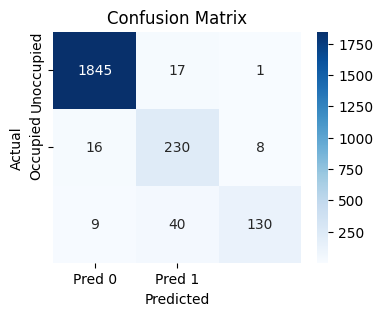

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true labels and predictions
# y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
# y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1","Pred 3"], yticklabels=["Unoccupied", "Occupied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Unique labels: [0 1 3]
Epoch 1/50, Loss: 0.4423, Val Loss: 0.1869
Epoch 2/50, Loss: 0.1812, Val Loss: 0.1597
Epoch 3/50, Loss: 0.1348, Val Loss: 0.1375
Epoch 4/50, Loss: 0.1324, Val Loss: 0.1178
Epoch 5/50, Loss: 0.1245, Val Loss: 0.1114
Epoch 6/50, Loss: 0.1280, Val Loss: 0.1054
Epoch 7/50, Loss: 0.1155, Val Loss: 0.1153
Epoch 8/50, Loss: 0.1177, Val Loss: 0.1042
Epoch 9/50, Loss: 0.1107, Val Loss: 0.1068
Epoch 10/50, Loss: 0.1293, Val Loss: 0.1417
Epoch 11/50, Loss: 0.1258, Val Loss: 0.4146
Epoch 12/50, Loss: 0.1509, Val Loss: 0.1122
Epoch 13/50, Loss: 0.1150, Val Loss: 0.1013
Epoch 14/50, Loss: 0.1086, Val Loss: 0.1142
Epoch 15/50, Loss: 0.1088, Val Loss: 0.1043
Epoch 16/50, Loss: 0.1127, Val Loss: 0.1033
Epoch 17/50, Loss: 0.1102, Val Loss: 0.1076
Epoch 18/50, Loss: 0.1107, Val Loss: 0.1199
Epoch 19/50, Loss: 0.1038, Val Loss: 0.1061
Epoch 20/50, Loss: 0.1031, Val Loss: 0.0991
Epoch 21/50, Loss: 0.1025, Val Loss: 0.0972
Epoch 22/50, Loss: 0.1045, Val Loss: 0.1095
Epoch 23/50, Loss:

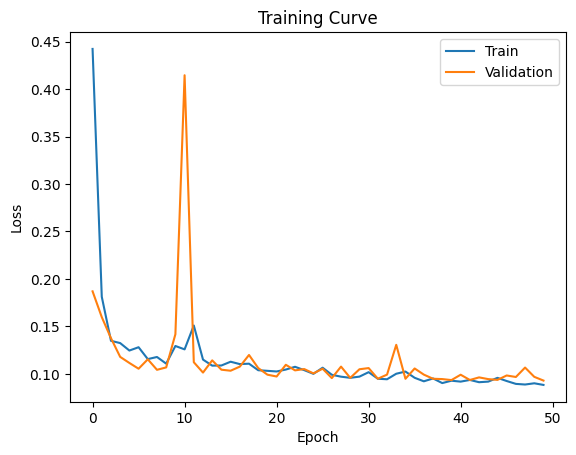

Train Accuracy: 0.9729
Test Accuracy: 0.9719


In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and inspect data
#df = pd.read_csv('PIRvision_data.csv')
pir_cols = [f'PIR_{i}' for i in range(1, 56)]
X = df[pir_cols].values
y = df['Label'].values

# Check unique labels and adjust if needed
print("Unique labels:", np.unique(y))
num_classes = len(np.unique(y))

# 2. Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reshaped = X_scaled.reshape(-1, 55, 1)  # [samples, seq_len, features]

# 3. Convert labels to 0-indexed if needed
if y.min() > 0:
    y = y - y.min()  # Convert to 0-indexed

le = LabelEncoder()
y = le.fit_transform(y)  # Converts to 0-indexed automatically

# 4. Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X_reshaped)
y_tensor = torch.LongTensor(y)  # For CrossEntropyLoss

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

# 6. Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 7. Define LSTM Model
class OccupancyLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_classes=2):
        super(OccupancyLSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )
        
    def forward(self, x):
        out, _ = self.lstm(x)  # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]     # Take last timestep
        return self.fc(out)

model = OccupancyLSTM(num_classes=num_classes)

# 8. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 9. Training loop
def train_model(model, num_epochs=50):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        val_epoch_loss = val_loss / len(test_loader)
        train_losses.append(epoch_loss)
        val_losses.append(val_epoch_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')
    
    return train_losses, val_losses

train_losses, val_losses = train_model(model)

# 10. Plot training
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Training Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 11. Evaluation
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

print(f'Train Accuracy: {evaluate(model, train_loader):.4f}')
print(f'Test Accuracy: {evaluate(model, test_loader):.4f}')